In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate


In [43]:
data = pd.read_csv("../DATA/RELIANCE.csv",parse_dates =["Date"],index_col="Date")


<Axes: xlabel='Date'>

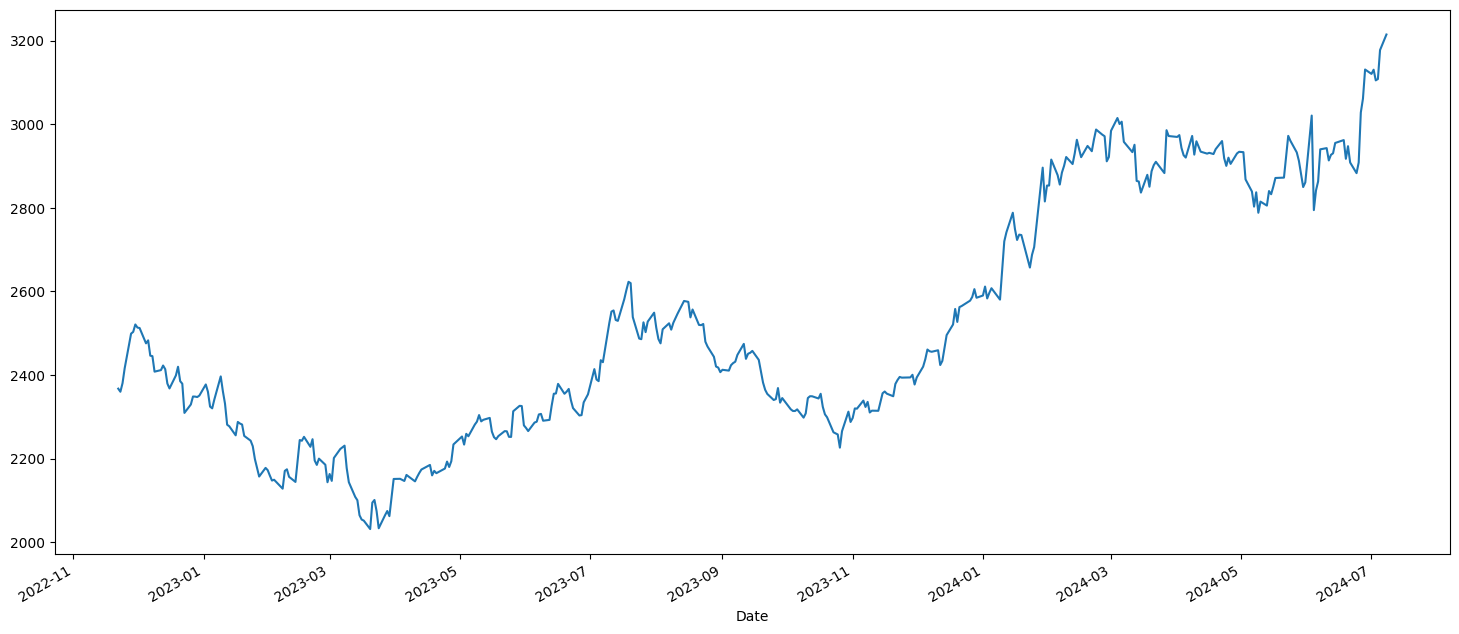

In [54]:
data[-400:].Close.plot(figsize =(18,8))

In [58]:
#golden crossover
#20sma cross karta hai 50 sma then we get buy signal and when 50sma cross 20 sma we get sell signal
data["20 sma"] = data.Close.rolling(window =20,min_periods=1).mean()
data["50 sma"] = data.Close.rolling(window = 50,min_periods=1).mean()
data["signal"] = 0
data["signal"] = np.where(data["20 sma"]> data["50 sma"],1,0)
data["signal"]


Date
1996-01-01    0
1996-01-02    0
1996-01-03    0
1996-01-04    0
1996-01-05    0
             ..
2024-07-02    1
2024-07-03    1
2024-07-04    1
2024-07-05    1
2024-07-08    1
Name: signal, Length: 7161, dtype: int64

In [59]:
data["position"] = data.signal.diff()
data["position"]

Date
1996-01-01    NaN
1996-01-02    0.0
1996-01-03    0.0
1996-01-04    0.0
1996-01-05    0.0
             ... 
2024-07-02    0.0
2024-07-03    0.0
2024-07-04    0.0
2024-07-05    0.0
2024-07-08    0.0
Name: position, Length: 7161, dtype: float64

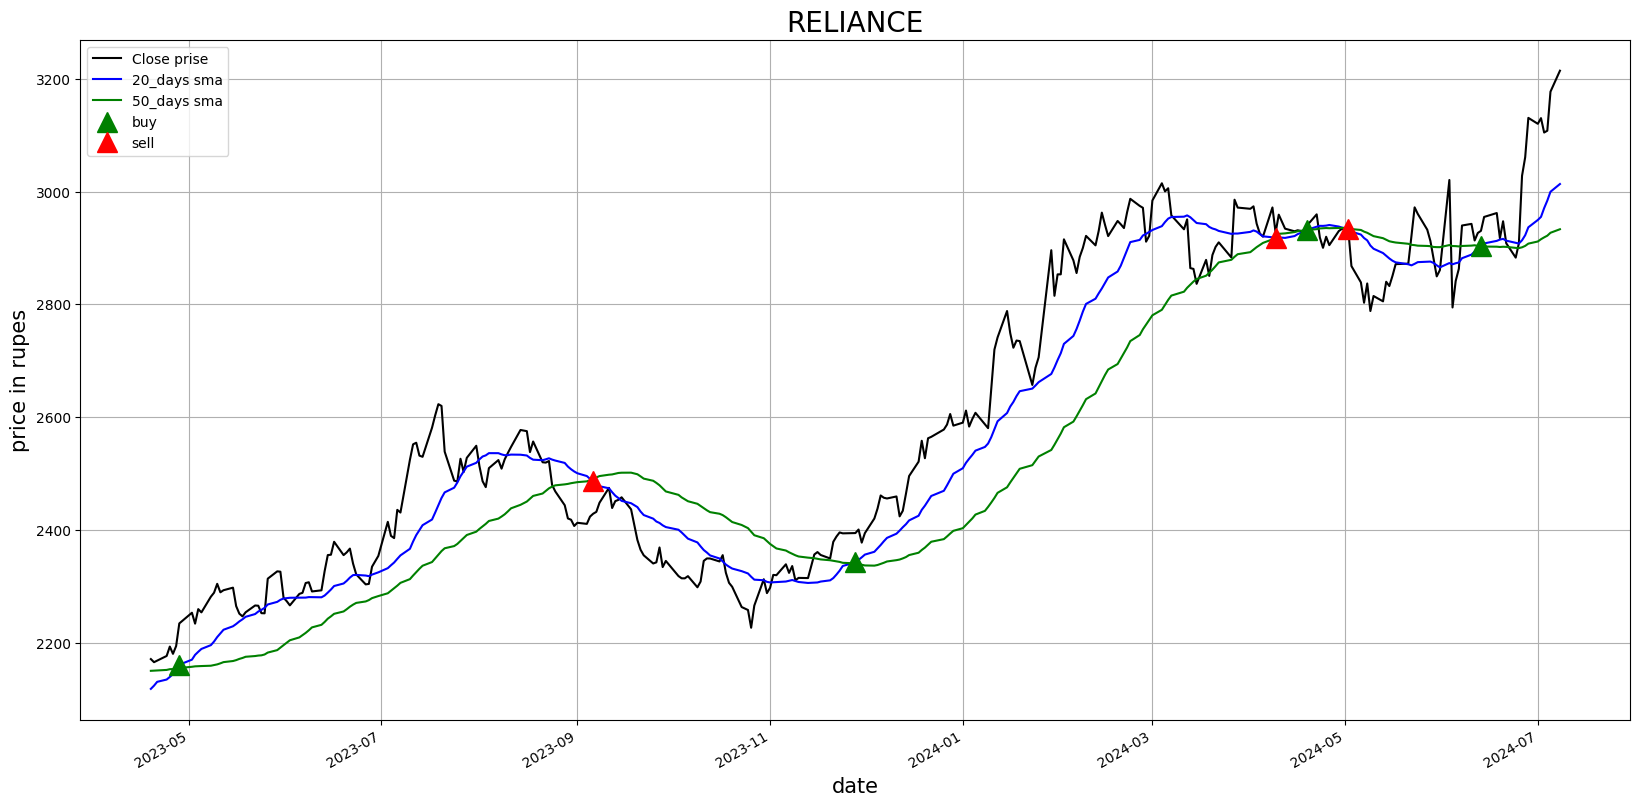

In [72]:
plt.figure(figsize=(20,10))
#plot close prise, short term and long term moving average
data.iloc[-300:]["Close"].plot(color="k",label="Close prise")
data.iloc[-300:]["20 sma"].plot(color="b",label="20_days sma")
data.iloc[-300:]["50 sma"].plot(color="g",label="50_days sma")
#plot buy signals
plt.plot(data.iloc[-300:][data.iloc[-300:]["position"]== 1].index,
         data.iloc[-300:]["20 sma"][data.iloc[-300:]["position"] == 1],
         "^",markersize = 15,color ="g", label ="buy")
#plot sell signal
plt.plot(data.iloc[-300:][data.iloc[-300:]["position"]==-1].index,
         data.iloc[-300:]["20 sma"][data.iloc[-300:]["position"]==-1],
          "^",markersize = 15, color = "r", label = "sell")
plt.ylabel("price in rupes", fontsize = 15)
plt.xlabel("date", fontsize = 15)
plt.title("RELIANCE", fontsize = 20)
plt.legend()
plt.grid()
plt.show()


In [79]:
df_pos = data.iloc[-200:][(data.iloc[-200:]["position"] == 1) | (data["position"]==-1)].copy()
df_pos["position"] =df_pos["position"].apply(lambda x: "buy" if x == 1 else "sell")
print(tabulate(df_pos[["Close","position"]],headers = "keys",tablefmt ="psql"))

+---------------------+---------+------------+
| Date                |   Close | position   |
|---------------------+---------+------------|
| 2023-11-28 00:00:00 | 2394.4  | buy        |
| 2024-04-09 00:00:00 | 2927.3  | sell       |
| 2024-04-19 00:00:00 | 2940.25 | buy        |
| 2024-05-02 00:00:00 | 2933.1  | sell       |
| 2024-06-13 00:00:00 | 2930.5  | buy        |
+---------------------+---------+------------+


C:\Users\bhise\AppData\Local\Temp\ipykernel_884\2505475074.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = data.iloc[-200:][(data.iloc[-200:]["position"] == 1) | (data["position"]==-1)].copy()


In [ ]:
def goldencrossover(name):
    path = f"..data.{name}"
    data =pd.read_csv("../data/